# Task 1 - k-Means Clustering

In this notebook, you will implement the k-means clustering algorithm.

## Packages

Following packages is all you need. Do not import any additional packages!

In case you are not familiar with [Numpy](http://www.numpy.org/) library, it provides support for large multi-dimensional arrays and matrices, along with functions to operate on these. [Matplotlib](https://matplotlib.org/) is a plotting library.

In [40]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import math
import pandas as pd

## Function

A function for plotting that we are going to use later on.

In [41]:
def plot_clusters(data, centroids):
    """
    Shows a scatter plot with the data points clustered according to the centroids.
    """
    # Assigning the data points to clusters/centroids.
    clusters = [[] for _ in range(centroids.shape[0])]
    for i in range(data.shape[0]):
        distances = np.linalg.norm(data[i] - centroids, axis=1)
        clusters[np.argmin(distances)].append(data[i])

    # Plotting clusters and centroids.
    fig, ax = plt.subplots()
    for c in range(centroids.shape[0]):
        if len(clusters[c]) > 0:
            cluster = np.array(clusters[c])
            ax.scatter(cluster[:, 0], cluster[:, 1], s=7)
    ax.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red')

## Data

Let us generate a dataset you are going to play with. We will stay in the Euclidean space because it is easy to plot.

In [42]:
# We would like to have some control over the randomly generated data.
# This is just for development purposes.
np.random.seed(0)

# Euclidean space.
DIMENSIONS = 2

# We will generate clusters.
CLUSTERS = [
    {
        'mean': (50, 50),
        'std': (5, 10),
        'size': 300
    },
    {
        'mean': (10, 85),
        'std': (10, 3),
        'size': 100
    },
    {
        'mean': (10, 10),
        'std': (6, 6),
        'size': 200
    },
    {
        'mean': (10, 75),
        'std': (10, 5),
        'size': 200
    },
    {
        'mean': (80, 20),
        'std': (5, 5),
        'size': 100
    }
]

# Initializing the dataset with zeros.
synthetic_data = np.zeros((np.sum([c['size'] for c in CLUSTERS]), DIMENSIONS))

# Generating the clusters.
start = 0
for c in CLUSTERS:
    for d in range(DIMENSIONS):
        synthetic_data[start:start + c['size'], d] = np.random.normal(c['mean'][d], c['std'][d], (c['size']))
    start += c['size']
print(synthetic_data)

[[58.82026173 36.93473148]
 [52.00078604 66.5813068 ]
 [54.89368992 48.81835955]
 ...
 [80.85621773 20.91725127]
 [80.19454353 17.64628751]
 [83.13282125 21.36398195]]


In [43]:
print('shape (size, dimensions) =', synthetic_data.shape)

shape (size, dimensions) = (900, 2)


And this is how our data look like when plotted.

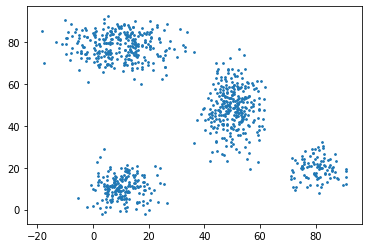

In [44]:
plt.figure()
plt.scatter(synthetic_data[:, 0], synthetic_data[:, 1], s=3)

## Implementation

A human can with an ease find four distinct clusters just by watching the plot. A computer, however, needs to be told how to find the clusters.

**Exercise:**

Implement the k-means clustering algorithm.

* Use the Euclidean (L<sub>2</sub>) distance.
* It is sufficient to use the basic Python constructs in your implementation, even though we heavily rely on Numpy throughout this assignment.

In [45]:
def euclidian_distance(p, q):
    return math.sqrt((p[0]-q[0])**2 + (p[1]-q[1])**2)

In [46]:
def kmeans(data, centroids, iterations=1):
    """
    Function implementing the k-means clustering.
    
    :param data
        data
    :param centroids
        initial centroids
    :return
        final centroids
    """
    for i in range(iterations):
        # point_to_cluster, cluster_by_point
        # E-step - calculates distance from data point to centroids, and selects the closest centroid
        point_to_cluster = np.zeros(data.shape[0]) # index of centroid given a data point
        for i, point in enumerate(data):
            min_distance = float('inf') # lowest distance from given data point to centroid
            for j, centroid in enumerate(centroids):
                distance = euclidian_distance(point, centroid)
                # selects centroid with smallest distance and becomes a part of the cluster
                if distance < min_distance: 
                    min_distance = distance
                    point_to_cluster[i] = j

        # M-step - recalculates a new centroid located on the mean position of the cluster
        centroids = pd.DataFrame(data).groupby(by=point_to_cluster).mean().values
    
    return centroids

We have prepared for you a small piece of code, so that you can test that the function works according the expectations.

c0 = [12.09713554 25.63638927]
c1 = [47.0871038  48.65309123]
c2 = [74.60270452 27.01620197]


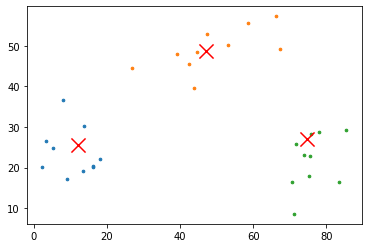

In [47]:
test_data = np.array([
    [66.24345364, 57.31053969],
    [43.88243586, 39.69929645],
    [44.71828248, 48.38791398],
    [39.27031378, 48.07972823],
    [58.65407629, 55.66884721],
    [26.98461303, 44.50054366],
    [67.44811764, 49.13785896],
    [42.38793099, 45.61070791],
    [53.19039096, 50.21106873],
    [47.50629625, 52.91407607],
    [2.29566576, 20.15837474],
    [18.01306597, 22.22272531],
    [16.31113504, 20.1897911 ],
    [13.51746037, 19.08356051],
    [16.30599164, 20.30127708],
    [5.21390499, 24.91134781],
    [9.13976842, 17.17882756],
    [3.44961396, 26.64090988],
    [8.12478344, 36.61861524],
    [13.71248827, 30.19430912],
    [74.04082224, 23.0017032 ],
    [70.56185518, 16.47750154],
    [71.26420853, 8.57481802],
    [83.46227301, 16.50657278],
    [75.25403877, 17.91105767],
    [71.81502177, 25.86623191],
    [75.95457742, 28.38983414],
    [85.50127568, 29.31102081],
    [75.60079476, 22.85587325],
    [78.08601555, 28.85141164]
])
test_centroids = np.array([
    [25, 50],
    [50, 50],
    [75, 50]
])

test_centroids = kmeans(test_data, test_centroids)

print('c0 =', test_centroids[0])
print('c1 =', test_centroids[1])
print('c2 =', test_centroids[2])
plot_clusters(test_data, test_centroids)

We expect the output to be similar to following.

```
c0 = [ 9 25]
c1 = [50 50]
c2 = [75 20]
```

If it is not the case, review your implementation, debug your algorithm, try it on paper, ...

## Clustering

Ready to run your implementation of k-means clustering on the dataset? Let's do it...

First, we need to initialize the centroids. We will go for a random initialization eventhough there are some disadvantages of doing so (see the Introduction to Data Mining from Tan et al.).

c0 = [32.  1.]
c1 = [75.  6.]
c2 = [65. 88.]
c3 = [16. 80.]


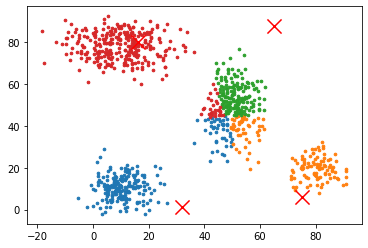

In [48]:
# Number of clusters.
K = 4

# Boundaries of our data.
x_min = np.min(synthetic_data[:, 0])
x_max = np.max(synthetic_data[:, 0])
y_min = np.min(synthetic_data[:, 1])
y_max = np.max(synthetic_data[:, 1])

# Generating random centroids within the data boundaries.
centroids = np.zeros((K, synthetic_data.shape[1]))
centroids[:, 0] = np.random.randint(x_min, x_max, size=K)
centroids[:, 1] = np.random.randint(y_min, y_max, size=K)

for i in range(len(centroids)):
    print('c%d =' % i, centroids[i])
plot_clusters(synthetic_data, centroids)

Finally, we run the `kmeans()` function you have implemented.

c0 = [16.91151089 15.50944412]
c1 = [71.46632686 25.98047733]
c2 = [51.30088712 54.82546398]
c3 = [12.53225785 75.65076956]


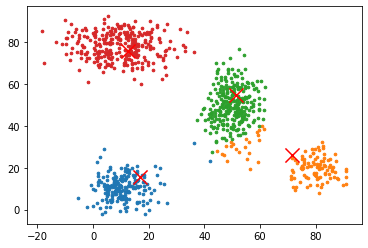

In [49]:
centroids = kmeans(synthetic_data, centroids)

# plt.scatter(data[:, 0], data[:, 1], s=3)
# plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red')

for i in range(len(centroids)):
    print('c%d =' % i, centroids[i])
plot_clusters(synthetic_data, centroids)

Congratulations! At this point, hopefully, you have found all four distinct clusters with the centroids aligned in their centers.

## Evaluation of Clustering

Silhouette Coefficient is an example of a measure for validation of the cluster quality.

**Exercise:**

Implement a function calculating the mean Silhouette Coefficient of all samples.

* Use the Euclidean (L<sub>2</sub>) distance.
* It is sufficient to use the basic Python constructs in your implementation, even though we heavily rely on Numpy throughout this assignment.

In [50]:
def silhouette_score(data, centroids):
    """
    Function implementing the k-means clustering.
    
    :param data
        data
    :param centroids
        centroids
    :return
        mean Silhouette Coefficient of all samples
    """
    # print(f"data points:\n{data[:5]}")
    # print(f"centroids:\n{centroids}")

    # find cluster map
    point_to_cluster = np.zeros(data.shape[0]) # index of centroid given a data point
    for i, point in enumerate(data):
        min_distance = float('inf')
        for j, centroid in enumerate(centroids):
            distance = euclidian_distance(point, centroid)
            # selects centroid with smallest distance and becomes a part of the cluster
            if distance < min_distance:
                min_distance = distance
                point_to_cluster[i] = j

    # find a: average intra cluster distance i.e the average distance between each point within a cluster.
    points_count, total_distance = 0, 0
    for i, point in enumerate(data):
        for j, centroid in enumerate(centroids):
            cluster_index = int(point_to_cluster[i])
            distance = euclidian_distance(point, centroids[cluster_index])
            points_count += 1
            total_distance = total_distance + distance
    average_intra_cluster_distance = total_distance / points_count

    # find b: average inter-cluster distance i.e the average distance between all clusters.
    inter_cluster_distance, inter_cluster_distance_count = 0, 0
    for i, c1 in enumerate(centroids):
        for j, c2 in enumerate(centroids[i:len(centroids)], i):
            if i == j: continue
            inter_cluster_distance = inter_cluster_distance + euclidian_distance(c1, c2)
            inter_cluster_distance_count += 1
    average_inter_cluster_distance = inter_cluster_distance / inter_cluster_distance_count

    # calculate silhuette score
    a = average_intra_cluster_distance
    b = average_inter_cluster_distance
    print(f"a: {a}, b: {b}")
    score = (b-a) / max(a,b)

    return score

First, let's see if the algorithm executes on the test data.

In [51]:
silhouette_score(test_data, test_centroids)

a: 8.655734837952016, b: 41.366287700499036


0.790753888755466

We expect the output to be around `0.675`.

Finally, let's cluster again our synthetic data and calculate the Silhouette Coefficient.

a: 8.655734837952016, b: 41.366287700499036
silhouette_coefficient = 0.790753888755466


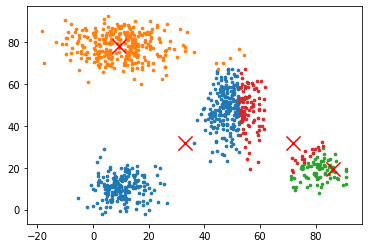

In [52]:
centroids = np.zeros((K, synthetic_data.shape[1]))
centroids[:, 0] = np.random.randint(x_min, x_max, size=K)
centroids[:, 1] = np.random.randint(y_min, y_max, size=K)

centroids = kmeans(synthetic_data, centroids)
silhouette_coefficient = silhouette_score(synthetic_data, centroids)

print('silhouette_coefficient =', silhouette_coefficient)
plot_clusters(synthetic_data, centroids)

**Exercise:**

* Run the clustering multiple times and pay attention to the results.
* In the *Discussion* below, describe your observations and discuss reasons for the possibly strong or weak performance of the algorithm. If you identify any weaknesses, suggest a possible solution.

## Discussion

Multiple executions reveal the varying clustering quality. This is due to the randomly initialized centroids and the sensitivity of the k-means algorithm to it. I.e. the cluster quality depends highly on the initial centroids.

We can observe that the clustering usually does not work, as the centroids can end up either between clusters, causing them to be merged into one, or a single cluster can have two centroids, causing it to be split up. The algorithm will perform the strongest when the randomized centroids are relatively well aligned with each cluster. The reason for the bad performance is that it is only ran with one iteration. If we would have ran with more, we would see the centroids moving closer and closer to the mean of the cluster with each iteration. A strong point here is that the number of centroids will always be optimal in this case since it is equal to the number of clusters.

## Comments

Our k-means clustering implementation can be characterized as a naive. This is for following reasons:

* We are evaluating only one `k` value instead of trying multiple.
* We are initializing the centroids randomly instead of using some heuristic.
* We are initializing and evaluating only one set of centroids instead of initializing multiple sets and analyzing their SSE (Sum of Squared Errors) or Silhouette Coefficient.

✌️